### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


import  warnings
warnings.filterwarnings("ignore")

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [100]:
df=pd.read_csv('vehicle-1.csv',keep_default_na=False)
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,car
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

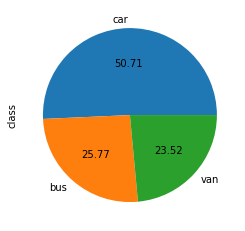

In [15]:
df['class'].value_counts().plot(kind='pie',autopct='%.2f')

### 3. Check for any missing values in the data 

In [16]:
df.isna().sum().sum()

0

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   compactness                  846 non-null    int64 
 1   circularity                  846 non-null    object
 2   distance_circularity         846 non-null    object
 3   radius_ratio                 846 non-null    object
 4   pr.axis_aspect_ratio         846 non-null    object
 5   max.length_aspect_ratio      846 non-null    int64 
 6   scatter_ratio                846 non-null    object
 7   elongatedness                846 non-null    object
 8   pr.axis_rectangularity       846 non-null    object
 9   max.length_rectangularity    846 non-null    int64 
 10  scaled_variance              846 non-null    object
 11  scaled_variance.1            846 non-null    object
 12  scaled_radius_of_gyration    846 non-null    object
 13  scaled_radius_of_gyration.1  846 no

In [104]:
obj_cols=df.select_dtypes(include='object').columns[:-1]

In [105]:

obj_cols

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

In [106]:
for i in df.circularity:
    if type(i)==type('s'):
        print(i)

48
41
50
41
44

43
43
34
44
36
34
46
42
49
55
36
41
54
56
47
37
43
39
53
45
36
54
45
38
43
42
35
48
38
46
44
48
53
45
48
37
49
37
54
46
43
42
47
45
38
38
55
42
56
36
44
47
53
39
50
38
40
42
45
41
43
55
44
49
55
59
39
37
42
53
39
40
52
44
46
51
36
40
40
58
41
37
42
37
55
38
52
48
45
50
42
43
46
44
45
42
42
38
45

46
39
44
48
40
48
38
35
43
47
45
53

49
37
48
40
36
45
46
42
41
45
48
46
36
42
39
54
47
48
42
37
42
37
42
49
43
45
54
46
40
43
36
50
44
35
49
40
56
36
42
39
45
38
52
39
40
54
54
36
51
45
38
51
54
45
49
48
40
39
44
37
44
54
36
42
35
46
41
42
45
51
36
48
40
43
55
37
43
56
44
46
44
47
36
54
55
40
47
46
42
46
56
39
37
41
49
36
39
44
57
44
39
55
44
50
44
41
41
54
35
54
41
35
33
44
52
42
48
37
45
55
47
36
45
42
55
47
41
36
39
55
34
38
58
44
43
47
50
36
43
48
58
37
39
40
35
49
45

46
39
37
45
47
43
45
57
44
46
41
54
37
44
43
46
53
46
48
41
43
47
37
38
45
42
36
55
38
52
37
40
40
53
43
37
36
45
45
48
52
51
48
50
45
41
52
42
40
41
45
37
51
54
57
43
51
38
44
49
44
43
38
44
52
57
42
57
54


In [107]:
for i in obj_cols:
    df.loc[df[i]=='',i]=np.nan

In [108]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [109]:
df.shape

(846, 19)

In [110]:
df.dropna(inplace=True)

In [111]:
df.shape

(813, 19)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   compactness                  813 non-null    int64 
 1   circularity                  813 non-null    object
 2   distance_circularity         813 non-null    object
 3   radius_ratio                 813 non-null    object
 4   pr.axis_aspect_ratio         813 non-null    object
 5   max.length_aspect_ratio      813 non-null    int64 
 6   scatter_ratio                813 non-null    object
 7   elongatedness                813 non-null    object
 8   pr.axis_rectangularity       813 non-null    object
 9   max.length_rectangularity    813 non-null    int64 
 10  scaled_variance              813 non-null    object
 11  scaled_variance.1            813 non-null    object
 12  scaled_radius_of_gyration    813 non-null    object
 13  scaled_radius_of_gyration.1  813 no

In [114]:
x=df.iloc[:,:-1]

In [115]:
for i in obj_cols:
    x[i]=x[i].astype(np.number)

### 4. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [116]:
sc=StandardScaler()
x_std=sc.fit_transform(x)
x_std=pd.DataFrame(x_std)

In [117]:
x_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,-0.079822,-0.944703,0.314261,0.413803,0.279250,-0.128151,0.013207,-0.126809,-0.217151,-0.958335,0.373150,-0.093528,-0.781504,-0.053505,0.131793,1.380091,-0.159204,-0.098644
809,-0.565926,0.194828,0.124067,-0.181529,0.530251,0.513657,-0.289256,0.257876,-0.217151,0.766312,-0.493716,-0.401813,0.054092,-0.053505,-1.088104,0.819644,-0.484413,0.171837
810,1.500018,1.497149,1.201833,1.574700,0.655752,0.727593,1.616264,-1.409094,1.727163,1.732113,1.272121,1.613458,0.796844,-0.321192,-0.681472,-0.973784,-0.321809,0.712800
811,-0.930504,-1.433074,-0.256321,-0.687560,-0.473753,-0.342087,-1.015169,1.155476,-0.994877,-1.648193,-1.071626,-0.961293,-0.812452,-0.856567,-1.291420,1.380091,0.166004,-0.098644


### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [118]:
distortion=[]

### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

In [119]:
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distortion.append(kmeans.inertia_)
    

### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

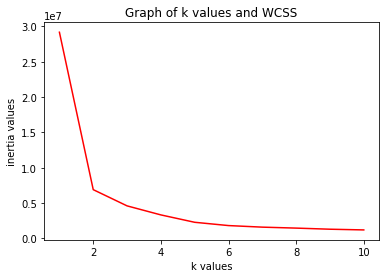

In [120]:
plt.plot(range(1,11), distortion, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('inertia values')
plt.show()

### 8. Find out the optimal value of K

In [121]:
from kneed import KneeLocator, DataGenerator
kl = KneeLocator(range(1, 11), distortion, curve="convex", direction="decreasing")
kl.elbow

2

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [122]:
m1 = KMeans(n_clusters=2,n_init=15,random_state=2)
m1.fit(x_std)
centroids=m1.cluster_centers_
centroid_df = pd.DataFrame(centroids)

centroid_df.columns=x.columns 
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.057870,1.094214,1.137086,1.003012,0.228961,0.308824,1.199680,-1.143997,1.203164,1.012899,1.153260,1.204740,1.004701,-0.079134,0.140445,0.247671,0.069710,0.232264
1,-0.561806,-0.581108,-0.603876,-0.532673,-0.121595,-0.164008,-0.637118,0.607547,-0.638968,-0.537924,-0.612466,-0.639805,-0.533570,0.042026,-0.074586,-0.131531,-0.037021,-0.123349


### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [123]:
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.057870,1.094214,1.137086,1.003012,0.228961,0.308824,1.199680,-1.143997,1.203164,1.012899,1.153260,1.204740,1.004701,-0.079134,0.140445,0.247671,0.069710,0.232264
1,-0.561806,-0.581108,-0.603876,-0.532673,-0.121595,-0.164008,-0.637118,0.607547,-0.638968,-0.537924,-0.612466,-0.639805,-0.533570,0.042026,-0.074586,-0.131531,-0.037021,-0.123349


### 11. Use kmeans.labels_ function to print out the labels of the classes

In [124]:
m1.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [125]:
x_std['Labels']=m1.labels_

In [126]:
x_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Labels
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,1
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,1
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,0
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,1
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,-0.079822,-0.944703,0.314261,0.413803,0.279250,-0.128151,0.013207,-0.126809,-0.217151,-0.958335,0.373150,-0.093528,-0.781504,-0.053505,0.131793,1.380091,-0.159204,-0.098644,1
809,-0.565926,0.194828,0.124067,-0.181529,0.530251,0.513657,-0.289256,0.257876,-0.217151,0.766312,-0.493716,-0.401813,0.054092,-0.053505,-1.088104,0.819644,-0.484413,0.171837,1
810,1.500018,1.497149,1.201833,1.574700,0.655752,0.727593,1.616264,-1.409094,1.727163,1.732113,1.272121,1.613458,0.796844,-0.321192,-0.681472,-0.973784,-0.321809,0.712800,0
811,-0.930504,-1.433074,-0.256321,-0.687560,-0.473753,-0.342087,-1.015169,1.155476,-0.994877,-1.648193,-1.071626,-0.961293,-0.812452,-0.856567,-1.291420,1.380091,0.166004,-0.098644,1
